In [1]:
# %pip install fastf1

In [35]:
#Import fastf1
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps
from fastf1.core import SessionResults

In [3]:
# %pip install seaborn

In [4]:
#Libraries import
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from timple.timedelta import strftimedelta
import seaborn as sns

In [5]:
#Enable cache:argument is path
cache = ff1.Cache.enable_cache('/root/code/data_science/F1_data_analytics')

In [6]:
#Import the list of races
from fastf1.events import _get_schedule
year = _get_schedule(2023)
year.head()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25 19:30:00,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00,Practice 2,2023-02-24 10:00:00,Practice 3,2023-02-25 10:00:00,None,NaT,None,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00,Practice 2,2023-03-03 18:00:00,Practice 3,2023-03-04 14:30:00,Qualifying,2023-03-04 18:00:00,Race,2023-03-05 18:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00,Practice 2,2023-03-17 20:00:00,Practice 3,2023-03-18 16:30:00,Qualifying,2023-03-18 20:00:00,Race,2023-03-19 20:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02 17:00:00,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00,Practice 2,2023-03-31 16:00:00,Practice 3,2023-04-01 12:30:00,Qualifying,2023-04-01 16:00:00,Race,2023-04-02 15:00:00,True
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30 17:00:00,Azerbaijan Grand Prix,sprint,Practice 1,2023-04-28 13:30:00,Qualifying,2023-04-28 17:00:00,Practice 2,2023-04-29 13:30:00,Sprint,2023-04-29 17:30:00,Race,2023-04-30 15:00:00,True


In [7]:
#Specify your session
YEAR = 2023
RACE = "Jeddah"
SESSION = "R"

# "SESSION" can either be 'FP1', 'FP2', 'FP3', 'Q', 'SQ', and 'R'
race = ff1.get_session(YEAR,RACE,SESSION)

In [8]:
#Load the session
race.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/root/code/data_science/F1_data_analytics/.venv/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/root/code/data_science/F1_data_analytics/.venv/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype inste

In [9]:
# laps = session.laps
laps = race.load_laps(with_telemetry=True)
laps

/root/code/data_science/F1_data_analytics/.venv/lib/python3.10/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/root/code/data_science/F1_data_analytics/.venv/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], 

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:04:28.186000,11,NaT,1,0 days 00:23:44.378000,NaT,NaT,0 days 00:00:29.964000,0 days 00:00:30.233000,NaT,...,MEDIUM,1.0,True,1,0 days 01:02:50.632000,Red Bull Racing,PER,1,False,2023-03-19 17:03:50.718
1,0 days 01:06:04.092000,11,0 days 00:01:35.906000,2,NaT,NaT,0 days 00:00:35.785000,0 days 00:00:29.903000,0 days 00:00:30.218000,0 days 01:05:03.971000,...,MEDIUM,2.0,True,1,0 days 01:04:28.186000,Red Bull Racing,PER,1,True,2023-03-19 17:05:28.272
2,0 days 01:07:38.921000,11,0 days 00:01:34.829000,3,NaT,NaT,0 days 00:00:35.340000,0 days 00:00:29.825000,0 days 00:00:29.664000,0 days 01:06:39.432000,...,MEDIUM,3.0,True,1,0 days 01:06:04.092000,Red Bull Racing,PER,1,True,2023-03-19 17:07:04.178
3,0 days 01:09:14.572000,11,0 days 00:01:35.651000,4,NaT,NaT,0 days 00:00:35.484000,0 days 00:00:30.147000,0 days 00:00:30.020000,0 days 01:08:14.405000,...,MEDIUM,4.0,True,1,0 days 01:07:38.921000,Red Bull Racing,PER,1,True,2023-03-19 17:08:39.007
4,0 days 01:10:49.445000,11,0 days 00:01:34.873000,5,NaT,NaT,0 days 00:00:35.024000,0 days 00:00:29.903000,0 days 00:00:29.946000,0 days 01:09:49.596000,...,MEDIUM,5.0,True,1,0 days 01:09:14.572000,Red Bull Racing,PER,1,True,2023-03-19 17:10:14.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,0 days 01:22:02.480000,18,0 days 00:01:36.522000,12,NaT,NaT,0 days 00:00:35.894000,0 days 00:00:30.346000,0 days 00:00:30.282000,0 days 01:21:01.852000,...,MEDIUM,12.0,True,1,0 days 01:20:25.958000,Aston Martin,STR,1,True,2023-03-19 17:21:26.044
938,0 days 01:23:41.023000,18,0 days 00:01:38.543000,13,NaT,0 days 01:23:39.953000,0 days 00:00:35.442000,0 days 00:00:30.290000,0 days 00:00:32.811000,0 days 01:22:37.922000,...,MEDIUM,13.0,True,1,0 days 01:22:02.480000,Aston Martin,STR,1,False,2023-03-19 17:23:02.566
939,0 days 01:25:35.328000,18,0 days 00:01:54.305000,14,0 days 01:24:01.109000,NaT,0 days 00:00:53.174000,0 days 00:00:30.418000,0 days 00:00:30.713000,0 days 01:24:34.197000,...,HARD,2.0,False,2,0 days 01:23:41.023000,Aston Martin,STR,1,False,2023-03-19 17:24:41.109
940,0 days 01:27:11.590000,18,0 days 00:01:36.262000,15,NaT,NaT,0 days 00:00:35.481000,0 days 00:00:30.118000,0 days 00:00:30.663000,0 days 01:26:10.809000,...,HARD,3.0,False,2,0 days 01:25:35.328000,Aston Martin,STR,1,True,2023-03-19 17:26:35.414


In [10]:
#Get a list of driver names
names = laps["Driver"].unique().tolist()
names

['PER',
 'VER',
 'ALO',
 'RUS',
 'HAM',
 'SAI',
 'LEC',
 'OCO',
 'GAS',
 'MAG',
 'TSU',
 'HUL',
 'ZHO',
 'DEV',
 'PIA',
 'SAR',
 'NOR',
 'BOT',
 'ALB',
 'STR']

In [11]:
#Iterate over driver names and pick from the laps object the fastest lap. Create a dictionary with driver name and faster lap
fastest_lap_car = {}
for name in names:
    lst = laps.pick_driver(name).pick_fastest()
    fastest_lap_car[name] =lst["LapTime"]

fastest_lap_car

{'PER': Timedelta('0 days 00:01:32.188000'),
 'VER': Timedelta('0 days 00:01:31.906000'),
 'ALO': Timedelta('0 days 00:01:32.240000'),
 'RUS': Timedelta('0 days 00:01:32.433000'),
 'HAM': Timedelta('0 days 00:01:32.941000'),
 'SAI': Timedelta('0 days 00:01:32.822000'),
 'LEC': Timedelta('0 days 00:01:33.056000'),
 'OCO': Timedelta('0 days 00:01:33.222000'),
 'GAS': Timedelta('0 days 00:01:33.392000'),
 'MAG': Timedelta('0 days 00:01:33.374000'),
 'TSU': Timedelta('0 days 00:01:33.931000'),
 'HUL': Timedelta('0 days 00:01:33.780000'),
 'ZHO': Timedelta('0 days 00:01:33.894000'),
 'DEV': Timedelta('0 days 00:01:33.609000'),
 'PIA': Timedelta('0 days 00:01:34.287000'),
 'SAR': Timedelta('0 days 00:01:34.469000'),
 'NOR': Timedelta('0 days 00:01:34.122000'),
 'BOT': Timedelta('0 days 00:01:34.384000'),
 'ALB': Timedelta('0 days 00:01:35.567000'),
 'STR': Timedelta('0 days 00:01:35.140000')}

In [12]:
#Clean the dictionary from timedelta and 0 days
fastest_lap_car = {k: str(v).split()[-1] for k, v in fastest_lap_car.items()}
fastest_lap_car

{'PER': '00:01:32.188000',
 'VER': '00:01:31.906000',
 'ALO': '00:01:32.240000',
 'RUS': '00:01:32.433000',
 'HAM': '00:01:32.941000',
 'SAI': '00:01:32.822000',
 'LEC': '00:01:33.056000',
 'OCO': '00:01:33.222000',
 'GAS': '00:01:33.392000',
 'MAG': '00:01:33.374000',
 'TSU': '00:01:33.931000',
 'HUL': '00:01:33.780000',
 'ZHO': '00:01:33.894000',
 'DEV': '00:01:33.609000',
 'PIA': '00:01:34.287000',
 'SAR': '00:01:34.469000',
 'NOR': '00:01:34.122000',
 'BOT': '00:01:34.384000',
 'ALB': '00:01:35.567000',
 'STR': '00:01:35.140000'}

In [19]:
#Convert the dictionary to pd dataframe
df = pd.DataFrame(list(fastest_lap_car.items()), columns=['Name', 'Time'])
df

,Name,Time
0,PER,00:01:32.188000
1,VER,00:01:31.906000
2,ALO,00:01:32.240000
3,RUS,00:01:32.433000
4,HAM,00:01:32.941000
5,SAI,00:01:32.822000
6,LEC,00:01:33.056000
7,OCO,00:01:33.222000
8,GAS,00:01:33.392000
9,MAG,00:01:33.374000


KeyError: 'Time'

/tmp/ipykernel_1581/60229227.py:8: FutureWarning: The behavior of fillna with timedelta64[ns] dtype and an incompatible value (<class 'int'>) is deprecated. In a future version, this will cast to a common dtype (usually object) instead of raising, matching the behavior of other dtypes.
  ax = df.plot(kind='barh',x="Name",y='Time_diff', legend=False, color='blue')


TypeError: value should be a 'Timedelta', 'NaT', or array of those. Got 'int' instead.

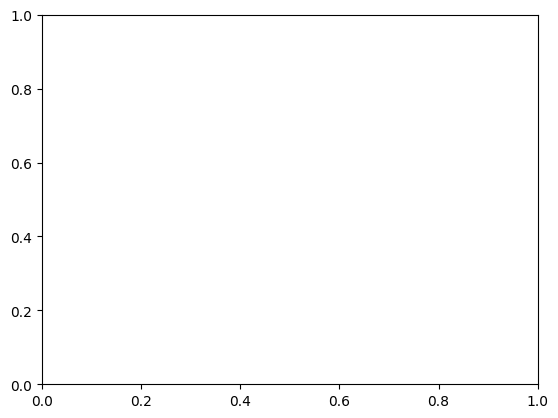

In [29]:

# Create a datetime column to perform operations on time
df['Time'] = pd.to_datetime(df['Time'])
#Calculate the time difference between the fastest lap time and each driver's lap time
fastest_time = df['Time'].min()
df['Time_diff'] = (df['Time'] - fastest_time)

# Create a horizontal bar chart
ax = df.plot(kind='barh',x="Name",y='Time_diff', legend=False, color='blue')

# Set the x-axis label
ax.set_xlabel('Time difference (ms)')
ax.set_ylabel('Name')
ax.set_title('Difference in milliseconds between each name')


# Show the plot
plt.show()

In [84]:
# # Convert Time values to seconds
# df['Time'] = pd.to_timedelta(df['Time']).dt.total_seconds()

# # Create a line plot
# ax1 = df.plot(kind='line', legend=False, color='blue')

# # Set the x-axis and y-axis labels
# ax1.set_xlabel('Name')
# ax1.set_ylabel('Time (seconds)')

# # Create a scatter plot
# ax2 = df.plot(kind='scatter', x='Name', y='Time', color='blue')

# # Set the x-axis and y-axis labels
# ax2.set_xlabel('Name')
# ax2.set_ylabel('Time (seconds)')

# # Show the plots
# plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

In [11]:
drivers = pd.unique(race.laps['Driver'])
print(drivers)


['PER' 'VER' 'ALO' 'RUS' 'HAM' 'SAI' 'LEC' 'OCO' 'GAS' 'MAG' 'TSU' 'HUL'
 'ZHO' 'DEV' 'PIA' 'SAR' 'NOR' 'BOT' 'ALB' 'STR']


In [13]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = race.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)

In [14]:
fastest_laps = Laps(list_fastest_laps)
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
37,0 days 02:05:32.028000,11,0 days 00:01:32.188000,38,NaT,NaT,0 days 00:00:33.721000,0 days 00:00:29.122000,0 days 00:00:29.345000,0 days 02:04:33.561000,...,HARD,20.0,True,2,0 days 02:03:59.840000,Red Bull Racing,PER,1,True,2023-03-19 18:04:59.926
99,0 days 02:24:11.139000,1,0 days 00:01:31.906000,50,NaT,NaT,0 days 00:00:33.543000,0 days 00:00:29.045000,0 days 00:00:29.318000,0 days 02:23:12.776000,...,HARD,32.0,True,2,0 days 02:22:39.233000,Red Bull Racing,VER,1,True,2023-03-19 18:23:39.319
149,0 days 02:24:26.568000,14,0 days 00:01:32.240000,50,NaT,NaT,0 days 00:00:33.731000,0 days 00:00:29.096000,0 days 00:00:29.413000,0 days 02:23:28.059000,...,HARD,33.0,False,2,0 days 02:22:54.328000,Aston Martin,ALO,1,True,2023-03-19 18:23:54.414
199,0 days 02:24:31.689000,63,0 days 00:01:32.433000,50,NaT,NaT,0 days 00:00:33.785000,0 days 00:00:29.221000,0 days 00:00:29.427000,0 days 02:23:33.041000,...,HARD,32.0,True,2,0 days 02:22:59.256000,Mercedes,RUS,1,True,2023-03-19 18:23:59.342
246,0 days 02:19:56.961000,44,0 days 00:01:32.941000,47,NaT,NaT,0 days 00:00:34.026000,0 days 00:00:29.225000,0 days 00:00:29.690000,0 days 02:18:58.046000,...,MEDIUM,29.0,True,2,0 days 02:18:24.020000,Mercedes,HAM,1,True,2023-03-19 18:19:24.106
299,0 days 02:24:41.714000,55,0 days 00:01:32.822000,50,NaT,NaT,0 days 00:00:33.929000,0 days 00:00:29.367000,0 days 00:00:29.526000,0 days 02:23:42.821000,...,HARD,35.0,True,2,0 days 02:23:08.892000,Ferrari,SAI,1,True,2023-03-19 18:24:08.978
346,0 days 02:20:04.672000,16,0 days 00:01:33.056000,47,NaT,NaT,0 days 00:00:34.048000,0 days 00:00:29.457000,0 days 00:00:29.551000,0 days 02:19:05.664000,...,HARD,31.0,True,2,0 days 02:18:31.616000,Ferrari,LEC,1,True,2023-03-19 18:19:31.702
398,0 days 02:23:24.323000,31,0 days 00:01:33.222000,49,NaT,NaT,0 days 00:00:34.178000,0 days 00:00:29.490000,0 days 00:00:29.554000,0 days 02:22:25.279000,...,HARD,33.0,True,2,0 days 02:21:51.101000,Alpine,OCO,1,True,2023-03-19 18:22:51.187
449,0 days 02:25:00.568000,10,0 days 00:01:33.392000,50,NaT,NaT,0 days 00:00:34.284000,0 days 00:00:29.499000,0 days 00:00:29.609000,0 days 02:24:01.460000,...,HARD,36.0,True,2,0 days 02:23:27.176000,Alpine,GAS,1,True,2023-03-19 18:24:27.262
493,0 days 02:15:45.680000,20,0 days 00:01:33.374000,44,NaT,NaT,0 days 00:00:34.389000,0 days 00:00:29.287000,0 days 00:00:29.698000,0 days 02:14:46.695000,...,HARD,36.0,True,2,0 days 02:14:12.306000,Haas F1 Team,MAG,1,True,2023-03-19 18:15:12.392


In [15]:
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 02:24:11.139000,1,0 days 00:01:31.906000,50,NaT,NaT,0 days 00:00:33.543000,0 days 00:00:29.045000,0 days 00:00:29.318000,0 days 02:23:12.776000,...,HARD,32.0,True,2,0 days 02:22:39.233000,Red Bull Racing,VER,1,True,2023-03-19 18:23:39.319
1,0 days 02:05:32.028000,11,0 days 00:01:32.188000,38,NaT,NaT,0 days 00:00:33.721000,0 days 00:00:29.122000,0 days 00:00:29.345000,0 days 02:04:33.561000,...,HARD,20.0,True,2,0 days 02:03:59.840000,Red Bull Racing,PER,1,True,2023-03-19 18:04:59.926
2,0 days 02:24:26.568000,14,0 days 00:01:32.240000,50,NaT,NaT,0 days 00:00:33.731000,0 days 00:00:29.096000,0 days 00:00:29.413000,0 days 02:23:28.059000,...,HARD,33.0,False,2,0 days 02:22:54.328000,Aston Martin,ALO,1,True,2023-03-19 18:23:54.414
3,0 days 02:24:31.689000,63,0 days 00:01:32.433000,50,NaT,NaT,0 days 00:00:33.785000,0 days 00:00:29.221000,0 days 00:00:29.427000,0 days 02:23:33.041000,...,HARD,32.0,True,2,0 days 02:22:59.256000,Mercedes,RUS,1,True,2023-03-19 18:23:59.342
4,0 days 02:24:41.714000,55,0 days 00:01:32.822000,50,NaT,NaT,0 days 00:00:33.929000,0 days 00:00:29.367000,0 days 00:00:29.526000,0 days 02:23:42.821000,...,HARD,35.0,True,2,0 days 02:23:08.892000,Ferrari,SAI,1,True,2023-03-19 18:24:08.978
5,0 days 02:19:56.961000,44,0 days 00:01:32.941000,47,NaT,NaT,0 days 00:00:34.026000,0 days 00:00:29.225000,0 days 00:00:29.690000,0 days 02:18:58.046000,...,MEDIUM,29.0,True,2,0 days 02:18:24.020000,Mercedes,HAM,1,True,2023-03-19 18:19:24.106
6,0 days 02:20:04.672000,16,0 days 00:01:33.056000,47,NaT,NaT,0 days 00:00:34.048000,0 days 00:00:29.457000,0 days 00:00:29.551000,0 days 02:19:05.664000,...,HARD,31.0,True,2,0 days 02:18:31.616000,Ferrari,LEC,1,True,2023-03-19 18:19:31.702
7,0 days 02:23:24.323000,31,0 days 00:01:33.222000,49,NaT,NaT,0 days 00:00:34.178000,0 days 00:00:29.490000,0 days 00:00:29.554000,0 days 02:22:25.279000,...,HARD,33.0,True,2,0 days 02:21:51.101000,Alpine,OCO,1,True,2023-03-19 18:22:51.187
8,0 days 02:15:45.680000,20,0 days 00:01:33.374000,44,NaT,NaT,0 days 00:00:34.389000,0 days 00:00:29.287000,0 days 00:00:29.698000,0 days 02:14:46.695000,...,HARD,36.0,True,2,0 days 02:14:12.306000,Haas F1 Team,MAG,1,True,2023-03-19 18:15:12.392
9,0 days 02:25:00.568000,10,0 days 00:01:33.392000,50,NaT,NaT,0 days 00:00:34.284000,0 days 00:00:29.499000,0 days 00:00:29.609000,0 days 02:24:01.460000,...,HARD,36.0,True,2,0 days 02:23:27.176000,Alpine,GAS,1,True,2023-03-19 18:24:27.262


In [16]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps["LapTimeDelta"] = fastest_laps["LapTime"] -pole_lap["LapTime"]

In [17]:
print(fastest_laps[['Driver',"LapTime","LapTimeDelta","LapNumber"]])

   Driver                LapTime           LapTimeDelta  LapNumber
0     VER 0 days 00:01:31.906000        0 days 00:00:00         50
1     PER 0 days 00:01:32.188000 0 days 00:00:00.282000         38
2     ALO 0 days 00:01:32.240000 0 days 00:00:00.334000         50
3     RUS 0 days 00:01:32.433000 0 days 00:00:00.527000         50
4     SAI 0 days 00:01:32.822000 0 days 00:00:00.916000         50
5     HAM 0 days 00:01:32.941000 0 days 00:00:01.035000         47
6     LEC 0 days 00:01:33.056000 0 days 00:00:01.150000         47
7     OCO 0 days 00:01:33.222000 0 days 00:00:01.316000         49
8     MAG 0 days 00:01:33.374000 0 days 00:00:01.468000         44
9     GAS 0 days 00:01:33.392000 0 days 00:00:01.486000         50
10    DEV 0 days 00:01:33.609000 0 days 00:00:01.703000         49
11    HUL 0 days 00:01:33.780000 0 days 00:00:01.874000         50
12    ZHO 0 days 00:01:33.894000 0 days 00:00:01.988000         49
13    TSU 0 days 00:01:33.931000 0 days 00:00:02.025000       

In [18]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

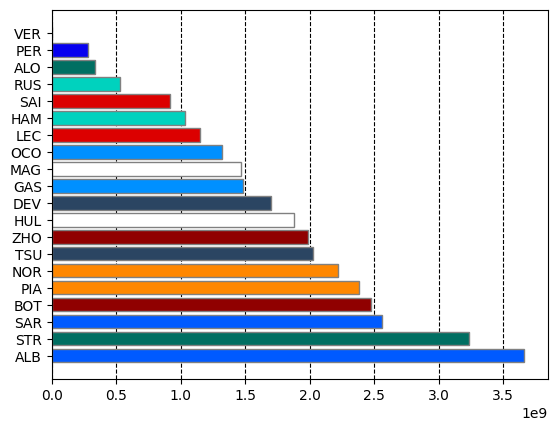

In [19]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

In [46]:
#Create a dataframe with the race results
Jedah_race_results = race.results
Jedah_race_results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
11,11,S PEREZ,PER,Red Bull Racing,3671C6,Sergio,Perez,Sergio Perez,1.0,1.0,NaT,NaT,NaT,0 days 01:21:14.894000,Finished,25.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,3671C6,Max,Verstappen,Max Verstappen,2.0,15.0,NaT,NaT,NaT,0 days 01:21:20.249000,Finished,19.0
14,14,F ALONSO,ALO,Aston Martin,358C75,Fernando,Alonso,Fernando Alonso,3.0,2.0,NaT,NaT,NaT,0 days 01:21:35.622000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6CD3BF,George,Russell,George Russell,4.0,3.0,NaT,NaT,NaT,0 days 01:21:40.760000,Finished,12.0
44,44,L HAMILTON,HAM,Mercedes,6CD3BF,Lewis,Hamilton,Lewis Hamilton,5.0,7.0,NaT,NaT,NaT,0 days 01:21:45.959000,Finished,10.0
55,55,C SAINZ,SAI,Ferrari,F91536,Carlos,Sainz,Carlos Sainz,6.0,4.0,NaT,NaT,NaT,0 days 01:21:50.770000,Finished,8.0
16,16,C LECLERC,LEC,Ferrari,F91536,Charles,Leclerc,Charles Leclerc,7.0,12.0,NaT,NaT,NaT,0 days 01:21:58.056000,Finished,6.0
31,31,E OCON,OCO,Alpine,2293D1,Esteban,Ocon,Esteban Ocon,8.0,6.0,NaT,NaT,NaT,0 days 01:22:07.726000,Finished,4.0
10,10,P GASLY,GAS,Alpine,2293D1,Pierre,Gasly,Pierre Gasly,9.0,9.0,NaT,NaT,NaT,0 days 01:22:09.641000,Finished,2.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,B6BABD,Kevin,Magnussen,Kevin Magnussen,10.0,13.0,NaT,NaT,NaT,0 days 01:22:19.720000,Finished,1.0


In [51]:
Jedah_race_results = Jedah_race_results[["FullName", "TeamName","Time"]]
Jedah_race_results


,FullName,TeamName,Time
11,Sergio Perez,Red Bull Racing,0 days 01:21:14.894000
1,Max Verstappen,Red Bull Racing,0 days 01:21:20.249000
14,Fernando Alonso,Aston Martin,0 days 01:21:35.622000
63,George Russell,Mercedes,0 days 01:21:40.760000
44,Lewis Hamilton,Mercedes,0 days 01:21:45.959000
55,Carlos Sainz,Ferrari,0 days 01:21:50.770000
16,Charles Leclerc,Ferrari,0 days 01:21:58.056000
31,Esteban Ocon,Alpine,0 days 01:22:07.726000
10,Pierre Gasly,Alpine,0 days 01:22:09.641000
20,Kevin Magnussen,Haas F1 Team,0 days 01:22:19.720000


In [2]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection


In [3]:
year = 2023
wknd = 2
ses = 'R'
driver = 'VER'
colormap = mpl.cm.plasma

In [4]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.1]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
/root/code/data_science/F1_data_analytics/.venv/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/root/code/data_science/F1_data_analytics/.venv/lib/python3.10/site-packag

In [6]:
"""Now, we create a set of line segments so that we can color them individually. 
This creates the points as a N x 1 x 2 array so that we can stack points together easily to get the segments. 
The segments array for line collection needs to be (numlines) x (points per line) x 2 (for x and y)"""
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

After this, we can actually plot the data.

NameError: name 'race' is not defined

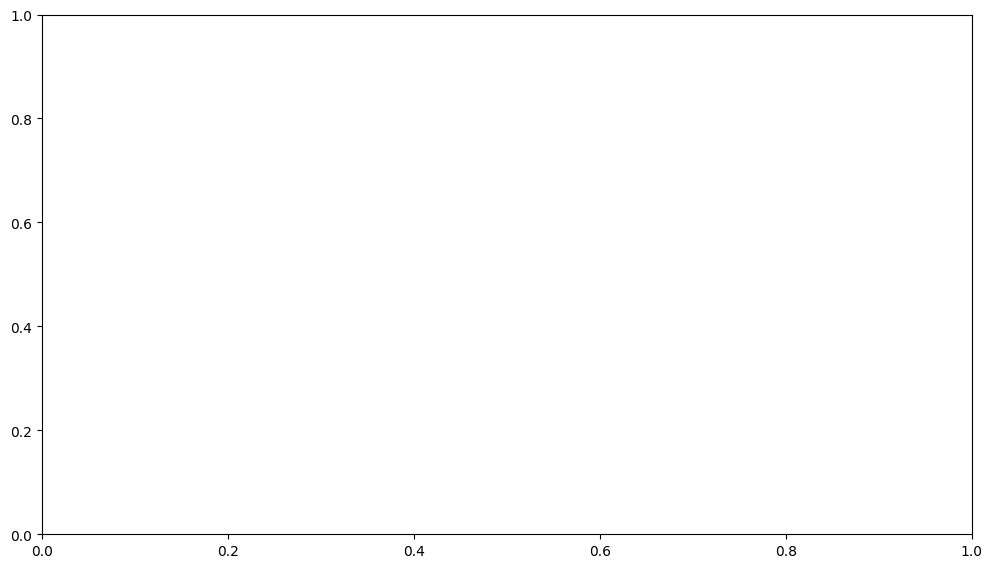

In [ ]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weakend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()